## open hours of domains created and closed between 12/08/19 - 07/10/19

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import glob
import os
import time
import itertools
import pprint
from termcolor import colored # for text colour

/home/goto/.pyenv/versions/3.6.7/lib/python3.6/site-packages/pandas/compat/__init__.py:84: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [2]:
# keywords
keywords = ["smbc", "smcc", "mitsui", "mitui", "sumitomo", "vpass"]#, "bank", "card", "credit"]
word_count = [0, 0, 0, 0, 0, 0, 0, 0]

In [3]:
path = '/home/goto/dom/'

# list of all files in current dir
things = os.listdir(path)

# list of "new" files
news = [entry for entry in things if "new" in entry]
# list of "del" files
dels = [entry for entry in things if "del" in entry]       
        
news.sort()
dels.sort()

In [4]:
def list_file_content(file):
    with open(file, "r") as f:
            return [domain.replace("\n", "") for domain in f.readlines()]

In [5]:
news_list = [list_file_content(n) for n in news]
dels_list = [list_file_content(d) for d in dels]

In [6]:
def list_purifier(some_list):
    lim = len(some_list) - 1
    for i, element in enumerate(some_list):
        if i == lim:
            break

        n_set1 = set(element)
        n_set2 = set(some_list[i + 1])
        if len(n_set1 & n_set2):
               some_list[i + 1] = list(n_set2 - n_set1)

In [7]:
list_purifier(news_list)
list_purifier(dels_list)

In [8]:
def fr(entry_new, entry_del):
    # assesing a rough estimate of life span sup
    sup_life_span = 0.5*(dels_list.index(entry_del) - news_list.index(entry_new))
    # dead relevant domains
    rel_domains = []
    
    if(0 < sup_life_span):

        # extracting overlapping elements
        common_set = set(entry_new) & set(entry_del)
        common_list = list(common_set)

        # relevant dead domains in common lists
        for dead in common_list:
            for key in keywords:
                if key in dead:
                    rel_domains.append(dead)    

        # diplay the result if not empty
        if rel_domains:
            print(f"sup of life span: {sup_life_span}")
            print(colored(f"{rel_domains}\n", "red"))
            
    return [rel_domains, sup_life_span]

In [9]:
pairs = itertools.product(news_list, dels_list)
# relevant ehemeral domain names
eph_domains = [y for y in [fr(entry_new, entry_del) for entry_new, entry_del in pairs] if y[0] != []]

sup of life span: 15.5
['dsmbcpbqc.co.uk']

sup of life span: 37.0
['henkelsmccoy2018.com']

sup of life span: 15.0
['jamesmcculloch.coach']

sup of life span: 5.0
['usmcciif.com', 'scottishroadrunnersmcc.com']

sup of life span: 3.0
['spsmbc.com']

sup of life span: 16.0
['guhiibqtgsmccd.co.uk']

sup of life span: 16.0
['iptvpass.com']

sup of life span: 6.0
['mysmbced.com']

sup of life span: 16.0
['forkliftsumitomoindo.com']

sup of life span: 2.0
['mymjsmbc.net']

sup of life span: 5.0
['sumitomorubber.com']

sup of life span: 48.0
['mitsuishidai.com']

sup of life span: 1.0
['smbc-a.com']

sup of life span: 2.0
['smbcsp.com']

sup of life span: 37.0
['uk-sumitomocorp.com']

sup of life span: 1.0
['smbcajp.com']

sup of life span: 7.0
['smbcrz.com']

sup of life span: 5.0
['smbcscu-co.com', 'smithedwardsmccoyarchitects.com', 'smbces-co.com']

sup of life span: 1.0
['smbc-b.com']

sup of life span: 50.0
['rusmcc.com']

sup of life span: 1.0
['scsmbc.com', 'smbc-in.com']

sup of life

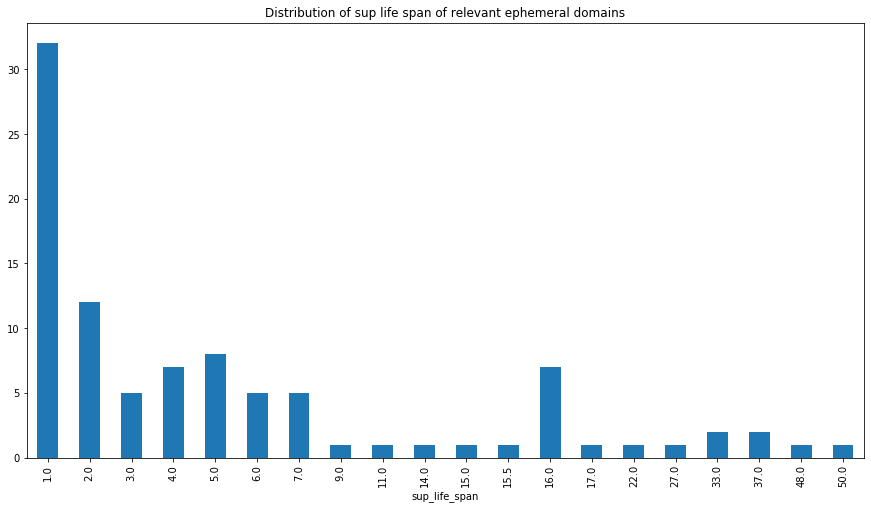

In [10]:
df = pd.DataFrame(eph_domains, columns = ["domains", "sup_life_span"]).sort_values("sup_life_span")
df_counts = df.groupby("sup_life_span")['domains'].nunique()
df_counts.plot.bar(title = "Distribution of sup life span of relevant ephemeral domains", figsize = (15, 8))

## わかったこと
- 1, 2日で消えるものが圧倒的に多い
- 比較的長期間で持つものは関連性がなく偶然キーワードを含むドメイン名のものが多い
- smbcプラス2文字のドメインはそれなりにあり，1週間以内に消えるものが多い
- smbcやsmccを含むもので，同時に"card"や"bank"など，直接的に金融関係の単語を含むものは見受けられなかった
    - 住友グループが展開している他の事業に関する偽サイトが観測された; 重機械工業のフォークリフトやゴム工業のゴム

In [13]:
pd.set_option('display.max_rows', 100)
df

,domains,sup_life_span
47,[smbcdsa.com],1.0
35,[smccbc.com],1.0
40,[smbc-ie.com],1.0
42,"[smbcbc.com, bc-smbc.com]",1.0
45,[smbcsa.com],1.0
93,[smbcqt.com],1.0
48,"[smbcv.com, smbcr.com]",1.0
52,"[smbcyb.com, smbccm.com, smbcbm.com]",1.0
55,"[smbcim.com, smbcna.com, smbcuv.com]",1.0
56,"[smbcoc.com, smbcou.com, smbccb.com]",1.0
